In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Ali/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-9 Python-3.9.12 torch-1.10.1 CUDA:0 (GeForce RTX 2060, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [26]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data ant.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=ant.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 4 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.2-235-g75728bb Python-3.9.12 torch-1.10.1 CUDA:0 (GeForce RTX 2060, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, ancho

# 6. Load Custom Model

In [5]:
import os

In [27]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp12/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Ali/.cache\torch\hub\master.zip
YOLOv5  2022-11-12 Python-3.9.12 torch-1.10.1 CUDA:0 (GeForce RTX 2060, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [44]:
img = os.path.join('ants' , 'train', 'images', 'test.jpg')

In [45]:
results = model(img)

In [46]:
results.print()

image 1/1: 802x1201 1 ants
Speed: 39.9ms pre-process, 11.0ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


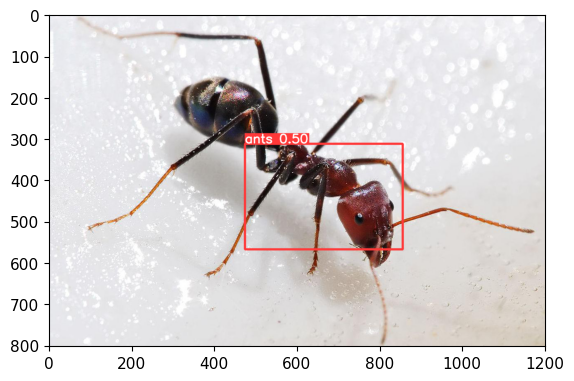

In [47]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [21]:
results.names

{0: '-', 1: '--'}

In [43]:
def annotate(img_path , x,y,w,h):
    img = cv2.imread(img_path)
    img =  cv2.cvtColor(img ,  cv2.COLOR_BGR2RGB)
    x = x * img.shape[1]
    y = y * img.shape[0]
    w = (int) (w * img.shape[1])
    h = (int) (h * img.shape[0])
    
    x = (int) (x - w/2)
    y = (int) (y- h/2)
    cv2.rectangle(img ,(x,y),((x+w),(y+h)), (0,255,0) ,2)
    plt.imshow(img)

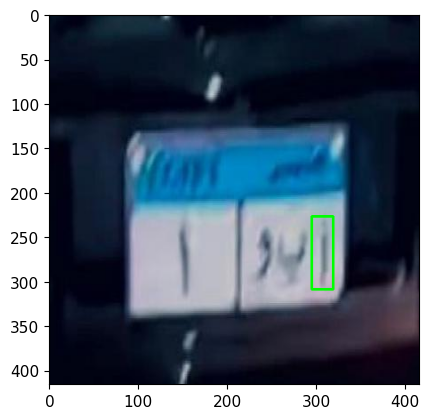

In [46]:
annotate('train/images/00003_jpg.rf.4a20d2701894601896b0f3426dc0223d.jpg',0.7379807692307693, 0.6442307692307693, 0.057692307692307696, 0.1971153846153846)